<a href="https://colab.research.google.com/github/ashutoshverma27/calculator-gui/blob/master/Stock%20Price%20Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#This progeram uses artificalil neural network called Long Short Term Memory to predict the closing stock price of a corp.

In [0]:
#import the libraries
import math
import pandas_datareader as web 
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [0]:
#get the stock quote
df=web.DataReader('AAPL',data_source='yahoo',start="2012-01-01",end='2019-12-17')
#show the data
df

In [0]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("close price history")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD $',fontsize=18)
plt.show()

In [0]:
#create a new dataframe with only the clos ecolumn
data=df.filter(['Close'])
#conver the dataframe to a numpy array
dataset=data.values
#get the number of rows totrain the model on
training_data_len=math.ceil(len(dataset)*0.8)

training_data_len

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)


In [0]:
#create the training data set
#creat the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#split the data inot x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

In [39]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1543, 60, 1)

In [41]:
#build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [43]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [44]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1543/1543 [==============================] - 125s 81ms/step - loss: 5.8484e-04


In [0]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len-60:,:]
#create the data set x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  


In [0]:
#convert the data to numpy array
x_test=np.array(x_test)

In [0]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))



In [0]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [51]:
#getting the root mean square error (RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

8.255439567565919

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


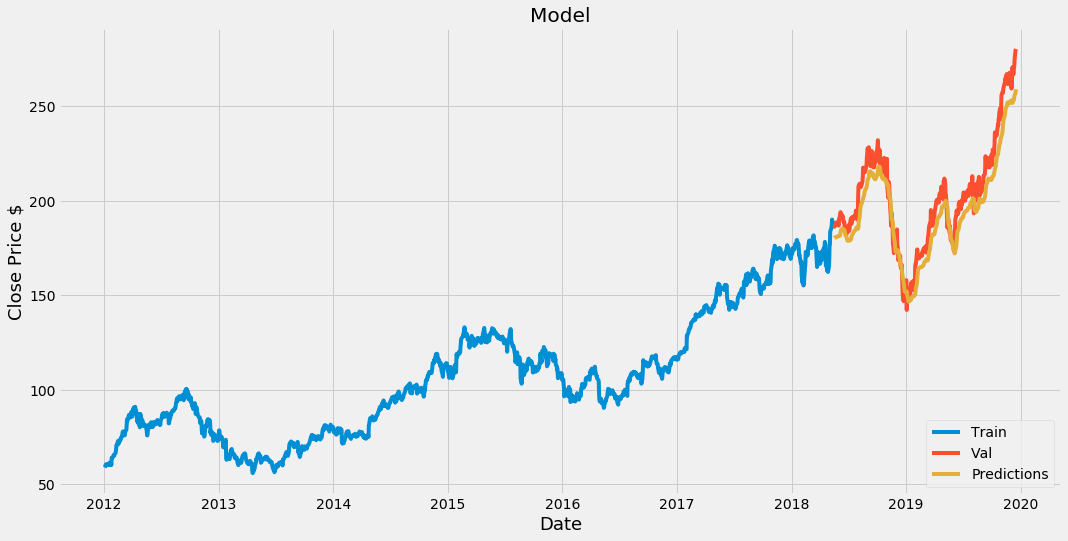

In [54]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price $',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [56]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,180.372009
2018-05-18,186.309998,180.540146
2018-05-21,187.630005,180.498199
2018-05-22,187.160004,180.564636
2018-05-23,188.360001,180.602524
...,...,...
2019-12-11,270.769989,254.091095
2019-12-12,271.459991,254.966858
2019-12-13,275.149994,255.874603


In [59]:
#get the quote
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-01-01')
#create a new data frame
new_df=apple_quote.filter(['Close'])
#get the last 60 days price values and convert the datafram to an array
last_60_days=new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create a empty list
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert th x-test data set to  a numpy array
X_test=np.array(X_test)
#reshaped the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scale price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[151.68074]]


In [60]:
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')
print(apple_quote2)

                  High         Low        Open      Close    Volume  Adj Close
Date                                                                          
2019-12-18  281.899994  279.119995  279.799988  279.73999  29007100  279.73999
